### Exercise 4 - Introduction to PyTorch (Solution)

In this exercise, we will introduce the fundamental concepts of PyTorch and show how this framework can be applied to build and train custom neural networks. 


**What is PyTorch?**\
PyTorch is a Python-based library designed for deep learning. It is distinguished by its dynamic computational graph, which enables researchers and developers to construct models with a high degree of flexibility. PyTorch has found extensive use in various scientific and engineering domains due to its ease of use and extensive research-friendly features.

This exercise is based on the [PyTorch 60-Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html).

### 4.1 Tensors
Tensors are used to encode inputs and outputs of a model, as well as a model's parameters. They are comparable to NumPy's ndarrays, but they have the advantage that PyTorch tensors can run on GPUs and other accelerators. 

Extra ressources: [Intuition behind tensors](https://www.youtube.com/watch?v=f5liqUk0ZTw)

In [1]:
import torch
import numpy as np

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**4.1.1 Tensor Initialization**

Tensors can be initialized in multiple ways.

In [2]:
# directly from data
data = [[1, 2], [3, 4]]
x_data = torch.tensor(data)
print(f"Tensor from data: \n {x_data} \n")

# from a NumPy array
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(f"Tensor from NumPy array: \n {x_np} \n")

# from another tensor
print("Shape given by another tensor:")
x_ones = torch.ones_like(x_data) # retains the properties of x_data
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_data, dtype=torch.float) # overrides the datatype of x_data
print(f"Random Tensor: \n {x_rand} \n")

# with random or constant values
shape = (2, 3,)
print("Shape defined:", shape)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)
print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Tensor from data: 
 tensor([[1, 2],
        [3, 4]]) 

Tensor from NumPy array: 
 tensor([[1, 2],
        [3, 4]]) 

Shape given by another tensor:
Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.4235, 0.8584],
        [0.8593, 0.6436]]) 

Shape defined: (2, 3)
Random Tensor: 
 tensor([[0.7441, 0.4116, 0.5099],
        [0.2526, 0.6099, 0.3120]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


**4.1.2 Tensor Attributes**

We can print information such as the tensor shape, the tensor datatype, and the device on which they are stored.

In [3]:
tensor = torch.rand(3, 4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


**4.1.3 Tensor Operations**

For a full list of available tensor operations check out the corresponding [PyTorch documentation](https://pytorch.org/docs/stable/torch.html).

In [4]:
# Moving tensor to the GPU if available
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f"Device tensor is stored on: {tensor.device}")

In [5]:
# standard numpy-like indexing and slicing
tensor = torch.ones(4, 4)
tensor[:,1] = 0
print(f"Second column replaced with zeros \n {tensor} \n")

Second column replaced with zeros 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 



---
<span style="color:orange">**EXERCISE**</span>: **Indexing and Slicing**

In [6]:
tensor_exercise = torch.tensor([[1, 2, 3, 4],
                       [5, 6, 7, 8],
                       [9, 10, 11, 12],
                       [13, 14, 15, 16]])

# Exercise 1: Select the last 3 rows of the first 3 columns and assign them to 'submatrix'
# submatrix = ...
submatrix = tensor_exercise[:3, :3]
print("Extracted submatrix:\n", submatrix)

# Exercise 2: Replace the extracted submatrix with a tensor of zeros in the original tensor
# ...
tensor_exercise[:3, :3] = torch.zeros(3, 3)
print("Tensor after replacement:\n", tensor_exercise)

Extracted submatrix:
 tensor([[ 1,  2,  3],
        [ 5,  6,  7],
        [ 9, 10, 11]])
Tensor after replacement:
 tensor([[ 0,  0,  0,  4],
        [ 0,  0,  0,  8],
        [ 0,  0,  0, 12],
        [13, 14, 15, 16]])


In [7]:
# joining tensors (concatenation or stacking)
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(f"Concatenated tensor \n {t1} \n")

Concatenated tensor 
 tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]]) 



In [8]:
# multiplying tensors
# element-wise product
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
# Alternative syntax:
print(f"tensor * tensor \n {tensor * tensor}")

# matrix multiplication
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
# Alternative syntax:
print(f"tensor @ tensor.T \n {tensor @ tensor.T}")

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [9]:
# inplace operations have a trailing underscore
print(f"Tensor before inplace addition \n {tensor} \n")
tensor.add_(5)
print(f"Tensor after inplace addition \n {tensor} \n")

Tensor before inplace addition 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

Tensor after inplace addition 
 tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]]) 



---
<span style="color:orange">**EXERCISE**</span>: **Element-wise Logarithm, multiplication and calculation of the mean**

In [10]:
tensor = torch.tensor([1.0, 2.0, 3.0, 4.0])

# Exercise 1: Calculate the element-wise natural logarithm and multiply the result with the tensor itself
# log_tensor = ...
log_tensor = torch.log(tensor) * tensor
print(log_tensor)

# Exercise 2: Calculate the mean of the resulting tensor
# mean_log = ...
mean_log = torch.mean(log_tensor)
print(mean_log)

tensor([0.0000, 1.3863, 3.2958, 5.5452])
tensor(2.5568)


Note: In-place operations can be problematic when computing derivatives because of a loss of history. 

**4.1.4 Bridge with NumPy**

Tensors on the CPU and NumPy arrays can share their underlying memory locations, and a change to one will cause the other to change.

In [11]:
t = torch.ones(5)
print(f"t: {t}")
# tensor to NumPy array
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [12]:
t.add_(1)
# both arrays are modified
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]


In [13]:
n = np.ones(5)
# NumPy array to tensor
t = torch.from_numpy(n)

In [14]:
np.add(n, 1, out=n)
# both arrays are modified
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


### 4.2 Introduction to torch.autograd

``torch.autograd`` is PyTorch's engine for automatic differentiation. It is essential for the training of neural networks.

**4.2.1 Differentiation in Autograd**

The argument ``required_grad=True`` signals to ``autograd`` that every operation on those tensors should be tracked. This allows ``autograd`` to collect gradients.

In [15]:
a = torch.tensor([2., 3.], requires_grad=True)
b = torch.tensor([6., 4.], requires_grad=True)
Q = 3*a**3 - b**2

If ``a`` and ``b`` are parameters of a neural networks the error function ``Q`` could looks like this:

\begin{align}Q = 3a^3 - b^2\end{align}

For the training of the neural network we need to calculate the gradients with respect to the parameters: 

\begin{align}\frac{\partial Q}{\partial a} = 9a^2\end{align}

\begin{align}\frac{\partial Q}{\partial b} = -2b\end{align}

With ``autograd`` you can calculate those gradients by calling ``.backward()`` on Q. The ``gradient`` argument is used here to specify how much the tensors ``a`` and ``b`` should influence the gradient calculation of ``Q``. By providing ``external_grad`` as the gradient argument, you ensure that both ``a`` and ``b`` are treated as if they contribute equally to the gradient of ``Q`` (both having a weight of 1.0).

In [17]:
external_grad = torch.tensor([1., 1.])
Q.backward(gradient=external_grad)

# check if collected gradients are correct
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


---
<span style="color:orange">**EXERCISE**</span>: **torch.autograd**

In [18]:
x = torch.tensor([2.0, 3.0], requires_grad=True)
y = 2 * x[0] + 3 * x[1]

# Exercise 1: Calculate gradients
# ...
y.backward()

# Exercise 2: Print gradients of 'x'
#print("Gradients of x:", ...)
print("Gradients of x:", x.grad)

Gradients of x: tensor([2., 3.])


**4.2.2 Computational Graph**

``autograd`` functions by maintaining a record of both data (tensors) and executed operations in a directed acyclic graph (DAG) composed of Function objects. Within this graph structure, the input tensors serve as the starting point (leaves), and the output tensors act as the endpoints (roots). By traversing this graph in a reverse manner, one can automatically compute gradients using the chain rule.

- **Forward pass**: ``autograd`` performs operations to compute the resulting tensor and maintains the operation's gradient function in the DAG.

- **Backward pass**: ``autograd`` (triggered by calling ``.backward()`` on the DAG root) computes the gradients from each ``.grad_fn``, accumulates them in the corresponding tensor's ``.grad`` attribute, and applies the chain rule to propagate gradients to the leaf tensors.

``autograd`` tracks operations for tensors with ``requires_grad=True``, while setting ``requires_grad=False`` excludes them; if any input tensor has ``requires_grad=True``, the output tensor will also require gradients.

Note: In PyTorch, DAGs (Directed Acyclic Graphs) are dynamic, and it's important to know that a new graph is built from scratch after each ``.backward()`` call. This flexibility enables the use of control flow statements and the ability to modify the model's shape, size, and operations in each iteration as required.


---
<span style="color:orange">**EXERCISE**</span>: **DAG**\
Think about the answers before executing the following code.


In [19]:
x = torch.rand(5, 5)
y = torch.rand(5, 5)
z = torch.rand((5, 5), requires_grad=True)

a = x + y
print(f"Does `a` require gradients?: {a.requires_grad}")
b = x + z
print(f"Does `b` require gradients?: {b.requires_grad}")

Does `a` require gradients?: False
Does `b` require gradients?: True


### 4.3 Neural Networks with PyTorch

The ``torch.nn`` package can be used to construct neural networks. ``nn.Module``s contain layers, and a method ``forward(input)`` that returns the ``output``.

Typical training procedure for a neural network:
1. Define neural network with some learnable parameters (weights)
2. Iterate over dataset of inputs
3. Process input through network
4. Compute the loss (how wrong is the output)
5. Backpropagate to calculate the gradient for each of the network's weights
6. Update the weights of the network

**4.3.1 Define the network**

Define the ``forward`` function. The ``backward`` function is is automatically defined. 

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 input image channel, 6 output channels, 5x5 square convolution
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        # an affine operation: y = Wx + b
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5 from image dimension
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling over a (2, 2) window
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # If the size is a square, you can specify with a single number
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = torch.flatten(x, 1) # flatten all dimensions except the batch dimension
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)

# learnable parameters of the model
params = list(net.parameters())
print(f"Number of learnable parameters: {len(params)} \n")
print(params[0].size())  # conv1's .weight

print(sum(len(p) for p in net.parameters()))

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)
Number of learnable parameters: 10 

torch.Size([6, 1, 5, 5])
472


In [27]:
# random input
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0086, -0.0776,  0.0718,  0.1250, -0.0378,  0.0303,  0.0305,  0.0819,
         -0.0379, -0.1208]], grad_fn=<AddmmBackward0>)


In [28]:
# zero gradient buffers of all parameters and backprops with random gradients
net.zero_grad()
out.backward(torch.randn(1, 10))

**4.3.2 Loss Function**

The loss function computes a value that estimates how far away the output is from the target. For the full list of available loss functions check out the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html#loss-functions).

Example: ``MSELoss`` (mean squared error (squared L2 norm))


In [29]:
output = net(input)
target = torch.randn(10)  # a dummy target, for example
target = target.view(1, -1)  # make it the same shape as output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.4233, grad_fn=<MseLossBackward0>)


**4.3.3 Backprop**

To initiate error backpropagation, use ``loss.backward()``, but make sure to clear existing gradients; otherwise, the new gradients will accumulate onto the existing ones. This step is crucial for accurate gradient calculations.


In [30]:
net.zero_grad()     # zeroes the gradient buffers of all parameters

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([-0.0077, -0.0042,  0.0005, -0.0052,  0.0120, -0.0077])


**4.3.4 Update the weights**

A simple update rule is the Stochastic Gradient Descent (SGD):

*weight = weight - learning_rate * gradient*

The ``torch.optim`` package implements different update rules such as SGB, Nesterov-SGD, Adam, RMSProp, etc.

In [25]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

---
<span style="color:orange">**EXERCISE**</span>: **Neural Networks (1)**
1. What is the purpose of the forward method in a PyTorch neural network model?
2. How do you define a convolutional layer in PyTorch, and what does the nn.Conv2d module do?
3. In the provided code, how many learnable parameters does the neural network model Net have, and how can you access them?
4. Explain what happens when you call net.zero_grad() and why it is important.
5. What does the optimizer.step() method do, and when is it typically called in the training loop?

Solution:
1. The forward method in a PyTorch neural network model defines the forward pass of the network. It specifies how the input data is processed layer by layer to produce the model's output. This method is called when you pass input data to the model.
2. To define a convolutional layer in PyTorch, you use the nn.Conv2d module. It represents a 2D convolution operation. You specify the number of input and output channels, as well as the kernel size. It applies the convolution operation to the input data to extract features.
3. The Net neural network model has learnable parameters in its layers, such as weights and biases. You can access these parameters using net.parameters(). In the provided code, the number of learnable parameters can be obtained using len(params), where params is a list of the model's parameters.
4. When you call net.zero_grad(), it zeroes the gradient buffers of all parameters in the network. This is necessary because gradients accumulate during backpropagation, and you typically want to start with fresh gradients for each mini-batch of training data.
5. The optimizer.step() method is used to update the model's parameters based on the gradients computed during backpropagation. It is typically called after calculating the gradients with loss.backward() in the training loop. It performs the parameter updates according to the optimization algorithm (e.g., stochastic gradient descent).

---
<span style="color:orange">**EXERCISE**</span>: **Neural Networks (2)**\
Create  a custom neural network layer called CustomLayer that inherits from nn.Module. The layer should take an input tensor and compute the element-wise square of the input tensor.
1. Define the CustomLayer class with a forward method that performs the specified operation.
2. Instantiate the CustomLayer.
3. Generate a random input tensor with dimensions (1, 3, 4, 4).
4. Apply the CustomLayer to the input tensor to calculate the element-wise square.
5. Print the input tensor and the resulting output tensor.

In [32]:
import torch
import torch.nn as nn

# 1. Define the CustomLayer class
# ...
# solution
class CustomLayer(nn.Module):
    def forward(self, x):
        return torch.abs(x) / torch.exp(x)

# 2. Instantiate the CustomLayer
# ...
# solution
custom_layer = CustomLayer()

# 3. Generate a random input tensor
# ...
# solution
input_tensor = torch.randn(1, 4)

# 4. Apply the CustomLayer to the input tensor
# ...
# solution
output_tensor = custom_layer(input_tensor)

# 5. Print the input tensor and the resulting output tensor
print("Input Tensor:")
print(input_tensor)
print("\nOutput Tensor (Element-wise Square):")
print(output_tensor)


Input Tensor:
tensor([[-0.0540,  1.6705, -0.5522,  0.1150]])

Output Tensor (Element-wise Square):
tensor([[0.0570, 0.3143, 0.9593, 0.1025]])


### 4.4 Training a Classifier (Optional)

When dealing with image, text, audio, or video data, you can use standard Python packages to load data into a NumPy array, which can then be converted into a ``torch.*Tensor``.

- For images: Packages like Pillow and OpenCV are useful.
- For audio: You can use packages such as scipy and librosa.
- For text: You have options like raw Python, Cython-based loading, NLTK, and SpaCy.

For image-related tasks, ``torchvision`` is a convenient package that provides data loaders for common datasets (e.g., ImageNet, CIFAR10, MNIST) and data transformers for images. This eliminates the need for writing repetitive code.

In this tutorial, we'll work with the CIFAR10 dataset, which includes classes like 'airplane,' 'automobile,' 'bird,' 'cat,' 'deer,' 'dog,' 'frog,' 'horse,' 'ship,' and 'truck.' The images in CIFAR-10 are 3-channel color images with dimensions 32x32 pixels.

Step:
1. Load and normalize CIFAR10 training and test datasets
2. Define Convolutional Neural Network (CNN)
3. Define loss function
4. Train network on training data
5. Test network on test data

**4.4.1 Load and normalize CIFAR10**

In [33]:
import torch
import torchvision
import torchvision.transforms as transforms

In [34]:
# transform PILImage images
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Note: If running on Windows and you get a BrokenPipeError, try setting the num_worker of torch.utils.data.DataLoader() to 0.

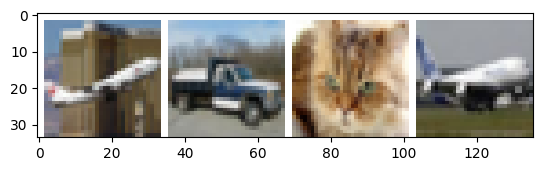

plane truck cat   plane


In [35]:
# Show example images and labels
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

**4.4.2 Define Convolutional Neural Network**

Use neural network from section 4.3 and modify it to take 3-channel images (RGB instead of grayscale).

---
<span style="color:orange">**EXERCISE**</span>: **Defining a classifier**\
Fill in the gaps in the following code.

In [39]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # define the first convolutional layer (conv1): 3 input channels, 6 output channels, kernel size: 5
        # self.conv1 = ...
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # apply the first convolutional layer, activation (relu), and pooling
        # x = ...
        x = self.pool(F.relu(self.conv1(x)))
        # apply the first convolutional layer, activation (relu), and pooling
        # x = ...
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

**4.4.3 Define loss function and optimizer**

---
<span style="color:orange">**EXERCISE**</span>: **Defining a loss function**\
Implement a cross entropy loss function

Hint: check out the [PyTorch documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

In [40]:
import torch.optim as optim

# criterion = ...
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

**4.4.4 Train network**

---
<span style="color:orange">**EXERCISE**</span>: **Training a classifier**\
Fill in the gaps in the following code.

In [41]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        # ...
        optimizer.zero_grad()

        # perform the forward pass
        # outputs = ...
        outputs = net(inputs)
        # calculate the loss ussing the criterion
        # loss = ...
        loss = criterion(outputs, labels)
        # perform the backward pass to compute gradients
        # ...
        loss.backward()
        # update the model's parameters using the optimizer
        # ...
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')


[1,  2000] loss: 2.175
[1,  4000] loss: 1.857
[1,  6000] loss: 1.663
[1,  8000] loss: 1.550
[1, 10000] loss: 1.489
[1, 12000] loss: 1.438
[2,  2000] loss: 1.369
[2,  4000] loss: 1.348
[2,  6000] loss: 1.353
[2,  8000] loss: 1.315
[2, 10000] loss: 1.272
[2, 12000] loss: 1.267
Finished Training


**4.4.5 Test network on test data**

In [ ]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 51 %


This performance is significantly better than random chance, which would be a 10% accuracy when randomly selecting from 10 classes. It appears that the network has learned something meaningful.